## Ejercicio 7

Usando Octave, Matlab o Python, escribe un código que genere una realización de un processo aleatorio de
Poisson. Utilice para ello, la propiedad de que el tiempo entre eventos es una variable aleatoria con distribución
exponencial.


[0, 0.08557707963512205, 0.11435902296455586, 0.2160438358192864, 0.38220670250388716, 0.4588787371876439, 0.5201297247585766, 0.6349430369301586, 0.8593994506181164, 1.1989666897342879, 1.3452901573609413]


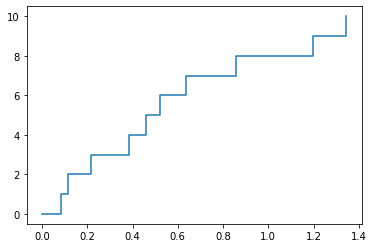

In [48]:
import numpy as np
from matplotlib import pyplot as plt
eventos = 10
lamb = 10
# generador de nros con dist. exponencial(lamb)
def X():
    return -np.log(1-np.random.uniform())/lamb

exponenciales = [X() for i in range(eventos)]

tiempos_de_eventos = []
tiempo_acumulado = 0
for i in range(eventos):
    tiempo_acumulado = tiempo_acumulado + exponenciales[i]
    tiempos_de_eventos.append(tiempo_acumulado)


tiempos_de_eventos.insert(0,0)
print(tiempos_de_eventos)
plt.step(tiempos_de_eventos, range(len(tiempos_de_eventos)),where = 'post')
plt.show()


## Ejercicio 8

Utilizando el código del ejercicio 0, genere realizaciones de un proceso aleatorio de Poisson con λ = 2 y λ = 5.
Utilizando los datos generados, estime empíricamente la tasa de eventos en ambos casos y calcule los errores
obtenidos para distintos tamaños de muestras.


In [70]:
# defino una funcion que retorna los tiempos obtenidos de un proceso de poisson para cierta cantidad de eventos
def pp(lamb, eventos):
    X = lambda: -np.log(1-np.random.uniform())/lamb

    exponenciales = [X() for i in range(eventos)]

    tiempos_de_eventos = []
    tiempo_acumulado = 0
    for i in range(eventos):
        tiempo_acumulado = tiempo_acumulado + exponenciales[i]
        tiempos_de_eventos.append(tiempo_acumulado)
    tiempos_de_eventos.insert(0,0)
    return tiempos_de_eventos

In [62]:
eventos = 100
realizacion1 = pp(2, eventos)
realizacion2 = pp(5, eventos)

print(f" estimador de lambda con lambda 2: {1/(realizacion1[-1]/eventos)}")

print(f" estimador de lambda con lambda 5: {1/(realizacion2[-1]/eventos)}")

 estimador de lambda con lambda 2: 1.8606165893449813
 estimador de lambda con lambda 5: 4.737381958424015


## Ejercicio 12

Utilice Octave, Matlab o Python para generar múltiples realizaciones de un proceso aleatorio de Poisson con λ = 1.

Luego, use los datos generados para estimar la probabilidad P(T2 < 1), siendo Tn el instante de tiempo en el que
ocurren n eventos.


In [82]:
import math

realizacion = pp(1, 100)
lamb_estimado = 1/(realizacion[-1]/eventos)
print(f"estimador de lambda con lambda 1: {lamb_estimado}")

f = lambda i: ((math.exp(-lamb_estimado)*pow(1,i))/math.factorial(i))
resultado = 1 - sum([f(i) for i in range(2)])
print(f"probabilidad que el segundo arrivo sea antes de 1 segundo: {resultado}")

estimador de lambda con lambda 1: 0.9692827581806822
probabilidad que el segundo arrivo sea antes de 1 segundo: 0.24128994031683004
